In [86]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# use cleaned but unchunked data
df = pd.read_csv('../data/imputed/arno.csv', index_col=0)

# make sure date index is date
df.index = pd.to_datetime(df.index)

# ignore temperature
df = df.drop('Temperature_Firenze', axis=1)

# nicer column names
df.columns = ['croci', 'cavallina', 'agata', 'mangona', 'piero', 'vernio', 'incisa', 'level']

# standardize due to different units/scales across columns
#data = StandardScaler().fit_transform(df)
#df = pd.DataFrame(data, index=df.index, columns=df.columns)

# what do we got
df

croci  cavallina  agata  mangona  piero  vernio  incisa  level
1998-01-01    3.8        0.2    4.2      3.0    2.2     2.2     0.0   1.82
1998-01-02    0.6        0.0    0.6      0.0    0.2     0.0     6.6   1.94
1998-01-03    0.0        0.0    0.0      0.0    0.0     0.0     0.0   2.11
1998-01-04    0.0        0.0    0.4      0.4    0.2     0.0     0.0   1.84
1998-01-05    0.0        0.0    0.2      0.0    0.2     0.0     0.4   1.88
...           ...        ...    ...      ...    ...     ...     ...    ...
2020-06-26    0.0        0.0    0.0      0.0    0.0     0.0     0.0   1.34
2020-06-27    0.0        0.0    0.0      0.0    0.0     0.0     0.2   1.21
2020-06-28    0.0        0.0    0.0      0.0    0.0     0.0     0.0   1.30
2020-06-29    0.0        0.0    0.0      0.0    0.0     0.0     0.0   1.19
2020-06-30    0.0        0.0    0.0      0.0    0.0     0.0     0.0   1.30

[8217 rows x 8 columns]

In [68]:
# we're investigating the individual features;
# turn this one df into many--a single feature
# against the single target

y = df['level']
def isolate_feature(col):
    df2 = pd.concat((df[col], y), axis=1)
    df2.columns = ['rain', 'level']
    df2.original_name = col
    return df2

croci = isolate_feature('croci')
cavallina = isolate_feature('cavallina')
agata = isolate_feature('agata')
mangona = isolate_feature('mangona')
piero = isolate_feature('piero')
vernio = isolate_feature('vernio')
incisa = isolate_feature('incisa')

data = (croci, cavallina, agata, mangona, piero, vernio, incisa,)

In [69]:
import matplotlib.pyplot as plt

def prep_df(df, lag=0):
    df2 = df.copy()
    df2['rain'] = df2['rain'].shift(lag)
    df2 = df2[df2['rain'] > min(df['rain'].dropna())]
    return df2

def calc_r2(df):
    return df.corr().iloc[0,1]**2

def plot_rain_results(x, y, r2, lag):
    plt.figure(figsize=(6.5,6.5))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f"Lag {lag} | r²={r2:.7f})")
    plt.scatter(x, y, s=5, alpha=0.25)
    plt.show()

def get_best(df):
    lag2r2 = {i:calc_r2(prep_df(df,i)) for i in range(31)}
    return max(lag2r2, key=lag2r2.get)

In [71]:
for datum in data:
    print(datum.original_name, '..', get_best(datum))

croci .. 1
cavallina .. 1
agata .. 1
mangona .. 1
piero .. 1
vernio .. 1
incisa .. 0


In [73]:
df_all = df.copy()
for datum in data:
    col = datum.original_name
    df_all[col] = df[col].shift(get_best(datum))
df_all = df_all.dropna()

In [74]:
df_all

croci  cavallina     agata   mangona     piero    vernio  \
1998-01-02  0.118304  -0.326091  0.257176 -0.017759 -0.019040 -0.122203   
1998-01-03 -0.327117  -0.355304 -0.301195 -0.394706 -0.353978 -0.377682   
1998-01-04 -0.410633  -0.355304 -0.394257 -0.394706 -0.387472 -0.377682   
1998-01-05 -0.410633  -0.355304 -0.332216 -0.344446 -0.353978 -0.377682   
1998-01-06 -0.410633  -0.355304 -0.363236 -0.394706 -0.353978 -0.377682   
...              ...        ...       ...       ...       ...       ...   
2020-06-26 -0.410633  -0.355304 -0.394257 -0.394706 -0.387472 -0.377682   
2020-06-27 -0.410633  -0.355304 -0.394257 -0.394706 -0.387472 -0.377682   
2020-06-28 -0.410633  -0.355304 -0.394257 -0.394706 -0.387472 -0.377682   
2020-06-29 -0.410633  -0.355304 -0.394257 -0.394706 -0.387472 -0.377682   
2020-06-30 -0.410633  -0.355304 -0.394257 -0.394706 -0.387472 -0.377682   

              incisa     level  
1998-01-02  0.762426  0.750825  
1998-01-03 -0.387536  1.044391  
1998-01-04 -0.387536  0.578140  
1998-01-05 -0.317842  0.647214  
1998-01-06 -0.387536  0.491797  
...              ...       ...  
2020-06-26 -0.387536 -0.285287  
2020-06-27 -0.352689 -0.509778  
2020-06-28 -0.387536 -0.354361  
2020-06-29 -0.387536 -0.544315  
2020-06-30 -0.387536 -0.354361  

[8216 rows x 8 columns]

In [81]:
df2 = pd.read_csv('../data/imputed/arno.csv', index_col=0)
df2.index = pd.to_datetime(df2.index)
df2 = df2.drop('Temperature_Firenze', axis=1)
df2.columns = ['croci', 'cavallina', 'agata', 'mangona', 'piero', 'vernio', 'incisa', 'level']

df2['croci'] = df2['croci'].shift(1)
df2['cavallina'] = df2['cavallina'].shift(1)
df2['agata'] = df2['agata'].shift(1)
df2['mangona'] = df2['mangona'].shift(1)
df2['piero'] = df2['piero'].shift(1)
df2['vernio'] = df2['vernio'].shift(1)
df2 = df2.dropna()
df2['total'] = df2['croci'] + df2['cavallina'] + df2['agata'] + df2['mangona'] + df2['piero'] + df2['vernio']
df2 = df2[['total', 'level']]
df2x = StandardScaler().fit_transform(df2)
df2 = pd.DataFrame(df2x, index=df2.index, columns = df2.columns)

In [82]:
df2

total     level
1998-01-02 -0.025661  0.750859
1998-01-03 -0.378089  1.044412
1998-01-04 -0.412836  0.578181
1998-01-05 -0.388017  0.647253
1998-01-06 -0.402908  0.491842
...              ...       ...
2020-06-26 -0.412836 -0.285209
2020-06-27 -0.412836 -0.509690
2020-06-28 -0.412836 -0.354280
2020-06-29 -0.412836 -0.544226
2020-06-30 -0.412836 -0.354280

[8216 rows x 2 columns]

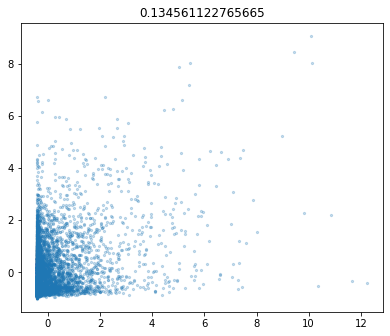

In [84]:
plt.figure(figsize=(6.5,6.5))
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(df2['total'], df2['level'], s=5, alpha=0.25)
plt.title(df2.corr().iloc[0,1]**2)
plt.show()

In [85]:
print("this is the best I can do? :/")

this is the best I can do? :/


In [87]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
df

croci  cavallina  agata  mangona  piero  vernio  incisa  level
1998-01-01    3.8        0.2    4.2      3.0    2.2     2.2     0.0   1.82
1998-01-02    0.6        0.0    0.6      0.0    0.2     0.0     6.6   1.94
1998-01-03    0.0        0.0    0.0      0.0    0.0     0.0     0.0   2.11
1998-01-04    0.0        0.0    0.4      0.4    0.2     0.0     0.0   1.84
1998-01-05    0.0        0.0    0.2      0.0    0.2     0.0     0.4   1.88
...           ...        ...    ...      ...    ...     ...     ...    ...
2020-06-26    0.0        0.0    0.0      0.0    0.0     0.0     0.0   1.34
2020-06-27    0.0        0.0    0.0      0.0    0.0     0.0     0.2   1.21
2020-06-28    0.0        0.0    0.0      0.0    0.0     0.0     0.0   1.30
2020-06-29    0.0        0.0    0.0      0.0    0.0     0.0     0.0   1.19
2020-06-30    0.0        0.0    0.0      0.0    0.0     0.0     0.0   1.30

[8217 rows x 8 columns]

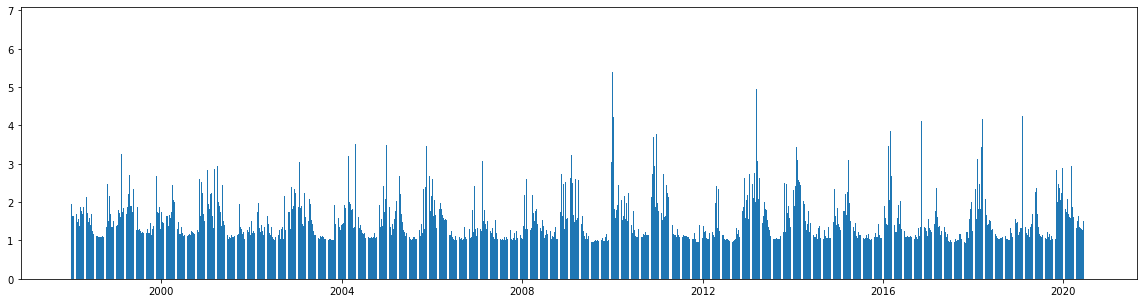

In [92]:
plt.figure(figsize=(20,5))
plt.bar(df.index, df['level'])
plt.show()

In [93]:
df.index.dtype

dtype('<M8[ns]')

In [95]:
pd.to_datetime(df.index, format='%Y-%m-%d').dtype

dtype('<M8[ns]')

In [97]:
df.index.year

Int64Index([1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', length=8217)

In [98]:
df['year'] = df.index.year

<AxesSubplot:xlabel='year'>

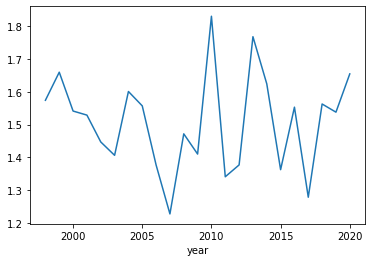

In [101]:
df.groupby('year').mean()['level'].plot()

In [105]:
df['dayofyear'] = df.index.dayofyear

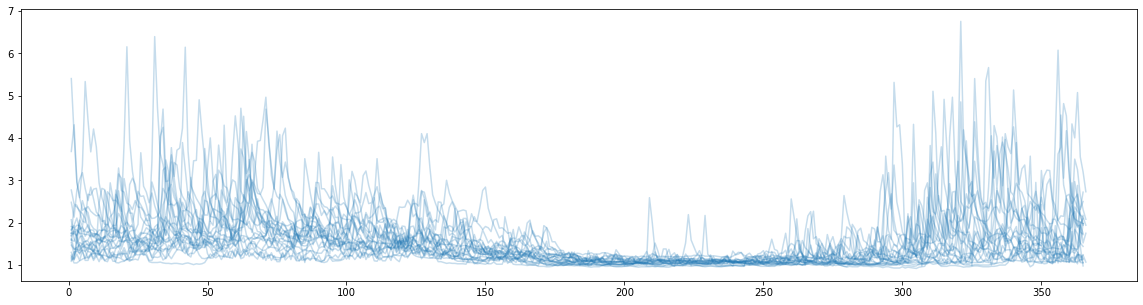

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))
for yr in df['year'].unique():
    tmp = df[df['year'] == yr]
    ax.plot(tmp['dayofyear'], tmp['level'], c='C0', alpha=0.25)
plt.show()